# Identifying phishing mails by using URL and mail features and ML based classification tools

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constructing-Dataset" data-toc-modified-id="Constructing-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constructing Dataset</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-defining-constants" data-toc-modified-id="Importing-libraries-and-defining-constants-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries and defining constants</a></span></li><li><span><a href="#Downloading-and-extracting-mails-(phishing-and-ham-mails)" data-toc-modified-id="Downloading-and-extracting-mails-(phishing-and-ham-mails)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Downloading and extracting mails (phishing and ham mails)</a></span></li><li><span><a href="#Loading-mails" data-toc-modified-id="Loading-mails-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading mails</a></span></li></ul></li><li><span><a href="#Data-preprocessing-and-features-extraction" data-toc-modified-id="Data-preprocessing-and-features-extraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing and features extraction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dropping-duplicates" data-toc-modified-id="Dropping-duplicates-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Dropping duplicates</a></span></li><li><span><a href="#UnderSampling" data-toc-modified-id="UnderSampling-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>UnderSampling</a></span></li></ul></li><li><span><a href="#Word-Cloud-Analysis" data-toc-modified-id="Word-Cloud-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Word Cloud Analysis</a></span></li><li><span><a href="#Mail-Features-extraction-functions" data-toc-modified-id="Mail-Features-extraction-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mail Features extraction functions</a></span><ul class="toc-item"><li><span><a href="#Mail-body-features" data-toc-modified-id="Mail-body-features-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Mail body features</a></span></li><li><span><a href="#URL-features" data-toc-modified-id="URL-features-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>URL features</a></span></li><li><span><a href="#Subject-line-features" data-toc-modified-id="Subject-line-features-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Subject line features</a></span></li><li><span><a href="#Sender's-address-features" data-toc-modified-id="Sender's-address-features-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Sender's address features</a></span></li></ul></li><li><span><a href="#Constructing-dataset-by-extracting-features" data-toc-modified-id="Constructing-dataset-by-extracting-features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Constructing dataset by extracting features</a></span></li></ul></li><li><span><a href="#Split-Training-and-Testing-data" data-toc-modified-id="Split-Training-and-Testing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Training and Testing data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Checking-dataset" data-toc-modified-id="Checking-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checking dataset</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Visualization:-Matplotlib" data-toc-modified-id="Visualization:-Matplotlib-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualization: Matplotlib</a></span></li><li><span><a href="#Histogram,-PDF-and-CDF" data-toc-modified-id="Histogram,-PDF-and-CDF-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Histogram, PDF and CDF</a></span></li><li><span><a href="#Violin-plots" data-toc-modified-id="Violin-plots-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Violin plots</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#PCA-for-visualization" data-toc-modified-id="PCA-for-visualization-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>PCA for visualization</a></span></li><li><span><a href="#PCA-for-dimentionality-reduction" data-toc-modified-id="PCA-for-dimentionality-reduction-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>PCA for dimentionality reduction</a></span></li></ul></li><li><span><a href="#t-SNE-using-Scikit-Learn" data-toc-modified-id="t-SNE-using-Scikit-Learn-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>t-SNE using Scikit-Learn</a></span></li><li><span><a href="#Single-Value-Decomposition" data-toc-modified-id="Single-Value-Decomposition-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Single Value Decomposition</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Variance-Filter" data-toc-modified-id="Variance-Filter-4.9.1"><span class="toc-item-num">4.9.1&nbsp;&nbsp;</span>Variance Filter</a></span></li><li><span><a href="#Feature-Importance-with-Random-Forest-Regressor" data-toc-modified-id="Feature-Importance-with-Random-Forest-Regressor-4.9.2"><span class="toc-item-num">4.9.2&nbsp;&nbsp;</span>Feature Importance with Random Forest Regressor</a></span></li><li><span><a href="#Univariate-using-SelectKBest" data-toc-modified-id="Univariate-using-SelectKBest-4.9.3"><span class="toc-item-num">4.9.3&nbsp;&nbsp;</span>Univariate using SelectKBest</a></span></li><li><span><a href="#High-Correlation-Filter" data-toc-modified-id="High-Correlation-Filter-4.9.4"><span class="toc-item-num">4.9.4&nbsp;&nbsp;</span>High Correlation Filter</a></span></li></ul></li></ul></li><li><span><a href="#Selecting-Best-Classifiers" data-toc-modified-id="Selecting-Best-Classifiers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Selecting Best Classifiers</a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#ExtraTrees-Classifier" data-toc-modified-id="ExtraTrees-Classifier-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>ExtraTrees Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Fine-tuning-selected-models" data-toc-modified-id="Fine-tuning-selected-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fine tuning selected models</a></span><ul class="toc-item"><li><span><a href="#ExtraTrees-Classifier" data-toc-modified-id="ExtraTrees-Classifier-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>ExtraTrees Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Ensemble-Model" data-toc-modified-id="Ensemble-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ensemble Model</a></span></li><li><span><a href="#Performance-Comparisons" data-toc-modified-id="Performance-Comparisons-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Performance Comparisons</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Constructing Dataset

### Importing libraries and defining constants

In [26]:
import os
from bs4 import BeautifulSoup
import mailparser
from collections import OrderedDict
import email
from urllib.request import urlretrieve
import tarfile
import shutil
import numpy as np
import glob
import mailparser
import re
import tldextract
import urllib.request
import warnings
import logging
import csv
import sys
import logging
import logging.config
import yaml
import pandas as pd
from logging import Formatter
from logging.handlers import RotatingFileHandler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_theme()
URLREGEX = r"^(https?|ftp)://[^\s/$.?#].[^\s]*$"
URLREGEX_NOT_ALONE = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
FLASH_LINKED_CONTENT = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])+).*\.swf"
HREFREGEX = '<a\s*href=[\'|"](.*?)[\'"].*?\s*>'
IPREGEX = r"\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?))\b"
MALICIOUS_IP_URL = r"\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\/(www|http|https|ftp))\b"
EMAILREGEX = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"
GENERAL_SALUTATION = r'\b(dear|hello|Good|Greetings)(?:\W+\w+){0,6}?\W+(user|customer|seller|buyer|account holder)\b'
MAILS_DIR = 'mails'

TAR_DIR = os.path.join(MAILS_DIR, 'tar')


PHISHING_URL = '../mails/tar/phishing_mails.tar.xz'
HAM_URL = '../mails/tar/20030228_easy_ham_2.tar.bz2'
HARD_HAM_URL = '../mails/tar/20021010_hard_ham.tar.bz2'


with open('./logs/config/logging_config.yaml', 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)

logging.config.dictConfig(config)
logger = logging.getLogger('PhishingMailClassifier')
logger.debug('often makes a very good meal of %s', 'visiting tourists')
logger.info("Project Started\nConstants defined and libraries imported")
    
alexa_rank_cache = {}
cache_hit = 0
cache_miss = 0

### Downloading and extracting mails (phishing and ham mails)

In [27]:
def download_dataset(url):
    """download and unzip data from a url into the specified path"""
    logger.info("Downloading dataset from '%s'",url)
    # create directory if it doesn't exist
    if not os.path.isdir(TAR_DIR):
        os.makedirs(TAR_DIR)

    filename = url.rsplit('/', 1)[-1]
    tarpath = os.path.join(TAR_DIR, filename)
    print(filename)
    # download the tar file if it doesn't exist
    try:
        tarfile.open(tarpath)
        logger.info("Opened tar '%s'",tarpath)
    except:
        urlretrieve(url, tarpath)
        logger.info("Retrieving from URL '%s'",url)

    with tarfile.open(tarpath) as tar:
        dirname = os.path.join(MAILS_DIR, tar.getnames()[0])
        logger.info("Directory Name '%s'",dirname)
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
        tar.extractall(path=MAILS_DIR)

        cmds_path = os.path.join(dirname, 'cmds')
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)

    return dirname

In [28]:
ham_dir = download_dataset(HAM_URL)
logger.info("Downloaded Easy Ham Mails")
hard_ham_dir = download_dataset(HARD_HAM_URL)
logger.info("Downloaded Hard Ham Mails")
phishing_dir = download_dataset(PHISHING_URL)
logger.info("Downloaded Easy Phishing Mails")

20030228_easy_ham_2.tar.bz2
20021010_hard_ham.tar.bz2
phishing_mails.tar.xz


### Loading mails

In [29]:

def load_mails(dirpath):
    """load emails from the specified directory"""

    files = []
    filepaths = glob.glob(dirpath + '/*')
    for path in filepaths:
        with open(path, 'rb') as f:
            byte_content = f.read()
            str_content = byte_content.decode('utf-8', errors='ignore')
            files.append(str_content)
    logger.info("Loaded mails from '%s'",dirpath)
    return files

In [30]:
# load the datasets
phishing = load_mails(phishing_dir)
print("Number of phishing mails: ",len(phishing))
logger.debug("Number of phishing mails: %d",len(phishing))
ham = load_mails(ham_dir)
ham = ham + load_mails(hard_ham_dir)
print("Number of ham mails: ",len(ham))
logger.debug("Number of ham mails: %d",len(ham))

Number of phishing mails:  2239
Number of ham mails:  1650


## Data preprocessing and features extraction

#### Dropping duplicates

In [34]:
phishing = list(set(phishing))
ham = list(set(ham))
print("Number of phishing mails ",len(phishing))
print("Number of ham mails ",len(ham))

Number of phishing mails  1631
Number of ham mails  1631


#### UnderSampling 

In [35]:
import random
import copy

random.shuffle(phishing)
phishing = phishing[:1631]
print("Number of ham mails: ",len(ham))
print("Number of phishing mails: ",len(phishing))
logger.debug("UnderSampling\nNumber of ham mails: %d\nNumber of phishing mails: %d",len(ham),len(phishing))


Number of ham mails:  1631
Number of phishing mails:  1631


### Word Cloud Analysis

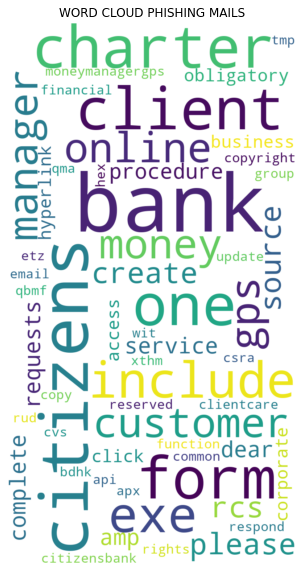

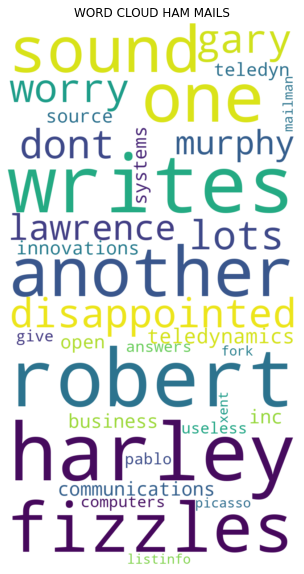

In [47]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
import nltk 
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stop_words = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
def filter_words(mails):
    for mail in mails:
        filtered = []
        filtered_text = cleanpunc(cleanhtml(getMailBody(mail)[0]))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
#                     w = lemmatizer.lemmatize(w)
                    filtered.append(w)
    return (filtered)

words_filtered = filter_words(phishing)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD PHISHING MAILS")
plt.show()


words_filtered = filter_words(ham)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD HAM MAILS")
plt.show()

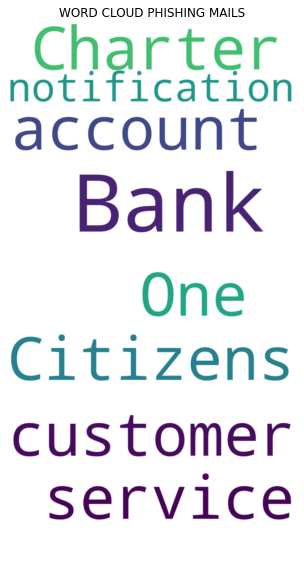

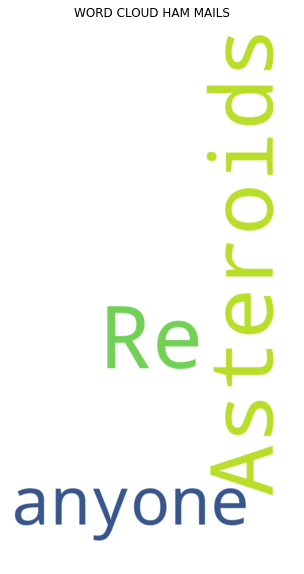

In [48]:
def filter_words(mails):
    for mail in mails:
        filtered = []
        filtered_text = ((getMailBody(mail)[1]))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
#                     w = lemmatizer.lemmatize(w)
                    filtered.append(w)
    return (filtered)

words_filtered = filter_words(phishing)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD PHISHING MAILS")
plt.show()


words_filtered = filter_words(ham)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("WORD CLOUD HAM MAILS")
plt.show()

### Mail Features extraction functions

#### Mail body features

In [49]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer


def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

def getMailBody(mail):
    try:
        parsed_mail = mailparser.parse_from_string(mail)
        mail_body = parsed_mail.body.lower()
        subject = parsed_mail.subject
        headers = parsed_mail.headers
        
    except UnicodeDecodeError as Argument:
        parsed_mail = email.message_from_string(mail)
        body = ""
        if parsed_mail.is_multipart():
            for part in parsed_mail.walk():
                # returns a bytes object
                payload = part.get_payload(decode=True)
                strtext = payload.decode()
                body += strtext
        else:
            payload = parsed_mail.get_payload(decode=True)
            strtext = payload.decode()
            body += strtext
        headers = email.parser.HeaderParser().parsestr(mail)
        mail_body = body.lower()
        subject = headers['Subject']
    return [mail_body,subject,headers]


def cleanBody(mail_body):
        filtered = []
        filtered_text = cleanpunc(cleanhtml(mail_body))
        word_tokens = word_tokenize(filtered_text)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
                    filtered.append(w)
        return filtered

def presenceHTML(mail):
    msg = email.message_from_string(mail)
    return int((msg.get_content_type() == 'text/html') == True)
  

def presenceHTMLFORM(message):
    return int((re.compile(r'<\s?\/?\s?form\s?>', re.IGNORECASE).search(message)
             != None) == True)


def presenceHTMLIFRAME(message):
    return int(re.compile(r'<\s?\/?\s?iframe\s?>',
                      re.IGNORECASE).search(message) != None) == True


def presenceJavaScript(message):
    return int(re.compile(r'<\s?\/?\s?script\s?>',
                      re.IGNORECASE).search(message) != None) == True


def presenceFlashContent(message):
    swflinks = re.compile(
        r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])+).*\.swf",
        re.IGNORECASE).findall(message)
    flashObject = re.compile(r'embed\s*src\s*=\s*\".*\.swf\"',
                             re.IGNORECASE).search(message)
    return int((swflinks != None and len(swflinks) > 0) or (flashObject != None)) == True


def presenceGeneralSalutation(message):
    return int(re.compile(GENERAL_SALUTATION,re.IGNORECASE).search(message) != None) == True


def numberOfAttachments(raw_mail):
    try:
        mail = mailparser.parse_from_string(raw_mail)
        count = len(mail.attachments)
        return count
    except:
        return 0

def mail_to(mail_body):
    return int(re.compile(r'mailto:',
                      re.IGNORECASE).search(mail_body) != None) == True

def popups(mail_body):
    if re.compile(r'window.open|onclick',re.IGNORECASE).search(mail_body):
         return 1
    return 0
       
def body_richness(mail_body):
    mail_body = cleanBody(mail_body)
    if len(set(mail_body))!=0:
        return (len(mail_body)/len(set(mail_body)))
    else:
        return len(mail_body)

#### URL features

In [41]:



def isURL(link):
    return re.compile(URLREGEX, re.IGNORECASE).search(link) is not None


def getURLs(mail_body):
    result = []
    cleanPayload = re.sub(r'\s+', ' ', mail_body)
    soup = BeautifulSoup(cleanPayload, 'html.parser')
    links = soup.find_all('a')
    i = 0
    for link in links:
        links[i] = link.get('href')
        i += 1

    for link in links:
        if isinstance(link, str) or isinstance(link, bytes):
            if isURL(link):
                result.append(link)
        else:
            continue

    urlregex = re.compile(URLREGEX_NOT_ALONE, re.IGNORECASE)
    links = urlregex.findall(cleanPayload)

    for link in links:
        if link not in result:
            result.append(link)

    res = list(OrderedDict.fromkeys(result))
    result = list(set(result))
    return result


def IPasURL(urls):
    result = []
    count = 0
    for url in urls:
        if re.compile(IPREGEX, re.IGNORECASE).search(url) and re.compile(IPREGEX, re.IGNORECASE).search(url).group(1) is not None:
            result.append(re.compile(IPREGEX, re.IGNORECASE).search(url).group(1))
            count += 1
    return count


def textLinkDisparity(mail_body):
    count = 0
    soup = BeautifulSoup(mail_body, 'html.parser')
    lists = soup.find_all('a')
    for item in lists:
        link = item.get('href')
        for string in item.stripped_strings:
            text = str(string)
            text = text.strip().replace('\n', '')
            text = text.strip().replace('\t', ' ')
            if isURL(text) and text != link:
                count += 1
    return count


def maliciousURL(urls):
    count = 0
    for url in urls:
        if ((re.compile(IPREGEX, re.IGNORECASE).search(url)
             is not None) == True or (len(re.compile(r'(https?://)',re.IGNORECASE).findall(url)) > 1)
                or (len(re.compile(r'(www.)',re.IGNORECASE).findall(url)) > 1)
                or (len(re.compile(r'(\.com|\.org|\.co)',re.IGNORECASE).findall(url)) > 1))== True:
            count += 1
    return count


def hexadecimalURL(urls):
    count = 0
    for url in urls:
        if ((re.compile(r'%[0-9a-fA-F]+', re.IGNORECASE).search(url)
             is not None) == True):
            count += 1
    return count


def getAlexaRank(domain):
    if domain in alexa_rank_cache:
#         cache_hit +=1
        return int(alexa_rank_cache[domain])
#     else:
#         cache_miss += 1
    try:
        xml = urllib.request.urlopen(
            'http://data.alexa.com/data?cli=10&dat=s&url=%s' %
            domain).read().decode('utf-8')
    except:
        alexa_rank_cache[domain] = 0
        return 0
    try:
        rank = (re.compile(r'RANK="(\d+)"',re.IGNORECASE).findall(xml))[1]
    except:
        rank = -1
    alexa_rank_cache[domain] = rank
    return int(rank)


def extractDomains(urls):
    domain_set = set()
    for url in urls:
        domain = tldextract.extract(url).registered_domain
        if domain not in domain_set:
            domain_set.add(domain)
        else:
            continue

    return list(domain_set)


def domainCounts(url):
    domains = tldextract.extract(url)
    count = (len(re.compile(r'\.',re.IGNORECASE).findall( domains.subdomain))) + \
        ((len(re.compile(r'\.',re.IGNORECASE).findall( domains.domain)))+1)
    if re.compile(IPREGEX,re.IGNORECASE).search(domains.domain) is not None:
        count -= 3
    return (count)


def presenceBadRankedURL(urls):
    domains = extractDomains(urls)
    max_rank = 0
    for domain in domains:
        rank = getAlexaRank(domain)
        max_rank = max(rank, max_rank)
        if rank == -1:
            return 0
    if max_rank > 70000:
        return 1
    return 0

def maxDomainsCounts(urls):
    count = 1
    for url in urls:
        count = max(domainCounts(url), count)
    return count

def at_in_url(urls):
    for url in urls:
        if (re.compile(r'@',re.IGNORECASE).search(url)):
            return 1
        else: 
            continue
    return 0
import json
import ast
def writeCache():
    with open('./cache/alexa_rank_cache.txt', 'w') as cache_file:
        cache_file.write(json.dumps(alexa_rank_cache))
        logger.info("Cache written")
        

def loadCache():
    try:
        with open('./cache/alexa_rank_cache.txt','r') as cache_file:
            cache = ast.literal_eval(cache_file.read())
            alexa_rank_cache = cache
            logger.info("Cache loaded")
    except FileNotFoundError:
        log.warning("No alexa rank cache found")


#### Subject line features

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.snowball import SnowballStemmer
import textdistance
from nltk.stem import WordNetLemmatizer
  

def isRepliedMail(subject):
    return (subject).startswith('Re:')

def isForwardedMail(subject):
    return (subject).startswith('Fwd:')

def subject_richness(subject):
    texts = subject.split()
    if len(set(texts))!=0:
        return (len(texts)/len(set(texts)))
    else:
        return len(texts)
def contains_verify(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('verify',w)) >0.9:
            return 1
     return 0

def contains_update(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('update',w)) >0.9:
            return 1
     return 0

def contains_access(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('access',w)) >0.9:
            return 1
     return 0
# def get_top_n_words(corpus, n=None):
#     filtered = []
#     for word in corpus:
#         word = stemmer.stem(word)
#         word = lemmatizer.lemmatize(word)
#         filtered+=word
#     corpus = set(filtered)
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

# body = ""
# for mail in phishing:
#     body += getMailBody(mail)[0]
#     body+=" "
# print(get_top_n_words(body))
def contains_prime_targets(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if ((jaro('bank',w)) >0.9 or (jaro('Paypal',w)) >0.9 or (jaro('ebay',w)) >0.9 or (jaro('amazon',w)) >0.9):
            return 1
     return 0

def contains_account(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('account',w)) >0.9 or jaro('profile',w) >0.9 or jaro('handle',w) >0.9 :
            return 1
     return 0
    
def contains_suspended(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (((jaro('closed',w)) or jaro('expiration',w))or jaro('suspended',w)) >0.9 or jaro('terminate',w) >0.9 or jaro('restricted',w) >0.9:
            return 1
     return 0

def contains_password(subject):
     subject = purify(subject)
     jaro = textdistance.Jaro()
     for w in subject.split():
         
         if (jaro('password',w)) >0.9 or jaro('credential',w) > 0.9:
            return 1
     return 0

def contains_urgent(subject):
    subject = purify(subject)
    jaro = textdistance.Jaro()
    for w in subject.split():
        if (jaro('urgent',w)) >0.9 or jaro('immediate',w) >0.9:
           return 1
    return 0

def purify(subject):
    filtered = ""
    word_tokens = word_tokenize(subject)
    for w in word_tokens:
         if w not in stop_words and w.isalpha():
                   w = stemmer.stem(w)
                   filtered+=(lemmatizer.lemmatize(w))
                   filtered+=" "
    return filtered


#### Sender's address features

In [43]:
def number_of_dots(headers):
        try:
            sender = headers["From"]
        except KeyError as Argument:
            sender = headers["from"]
        return len(re.compile(r'\.',re.IGNORECASE).findall(sender))
def number_of_dash(headers):
        try:
            sender = headers["From"]
        except KeyError as Argument:
            sender = headers["from"]
        return len(re.compile(r'\-',re.IGNORECASE).findall(sender))
   

### Constructing dataset by extracting features

In [83]:
filename = "./dataset/mails_dataset.csv"
fields = [
     "HTML", "HTMLForm", "IFrame", "FlashContent", "General Salutation",
    "Javascript", "mailto:","popups","body richness","Number of URLs", "Malicious URL", "text link disparity",
    "Attachments", "IP URLs", "hexadecimal URL", "Bad Rank Domain",
    "Maximum Domains Counts","@_in_url","Subject richness","Fwd: mail","Re: mail","contains account","contains verify",
    "contains update","contains prime targets","contains suspension","contains password","contains urgent","contains access",
    "number of dots","number of dash","Class"
]
rows = []


def constructDataSet(messages, label):
    i = 1
    
    for mail in messages:
        parsed_mail = getMailBody(mail)
        
        mail_body = parsed_mail[0]
        mail_subject = parsed_mail[1]
        mail_headers = parsed_mail[2]
        
        urls = getURLs(mail_body)
        feature = [0] * (len(fields))
        i = 0
        feature[i]= int(presenceHTML(mail)==True)
        i+=1
        feature[i]= int(presenceHTMLFORM(mail_body)==True)
        i+=1
        feature[i]= int(presenceHTMLIFRAME(mail_body)==True)
        i+=1
        feature[i]= int(presenceFlashContent(mail_body)==True)
        i+=1
        feature[i]= int(presenceGeneralSalutation(mail_body)==True)
        i+=1
        feature[i]= int(presenceJavaScript(mail_body)==True)
        i+=1
        feature[i]= int(mail_to(mail_body)==True)
        i+=1
        feature[i]= popups(mail_body)
        i+=1
        feature[i] = body_richness(mail_body)
        i+=1
        feature[i]= len(urls)
        i+=1
        feature[i]= (maliciousURL(urls))
        i+=1
        feature[i]= textLinkDisparity(mail_body)
        i+=1
        feature[i] = numberOfAttachments(mail)
        i+=1
        feature[i] = (IPasURL(urls))
        i+=1
        feature[i] = (hexadecimalURL(urls))
        i+=1
        feature[i] = int(presenceBadRankedURL(urls)==True)
        i+=1
        feature[i] = (maxDomainsCounts(urls))
        i+=1
        feature[i]= at_in_url(urls)
        i+=1
        feature[i] = subject_richness(mail_subject)
        i+=1
        feature[i]= int(isForwardedMail(mail_subject)==True)
        i+=1
        feature[i]= int(isRepliedMail(mail_subject)==True)
        i+=1
        feature[i]= int(contains_account(mail_subject)== True)
        i+=1
        feature[i]= int(contains_verify(mail_subject)==True)
        i+=1
        feature[i]= int(contains_update(mail_subject)==True)
        i+=1
        feature[i]= int(contains_prime_targets(mail_subject)==True)
        i+=1
        feature[i]= int(contains_suspended(mail_subject)==True)
        i+=1
        feature[i]= int(contains_password(mail_subject)==True)
        i+=1
        feature[i]= int(contains_urgent(mail_subject)==True)
        i+=1
        feature[i] = int(contains_access(mail_subject)==True)
        i+=1
        feature[i]= number_of_dots(mail_headers)
        i+=1
        feature[i]= number_of_dash(mail_headers)
        i+=1
        feature[i] = label
        rows.append(feature)

In [198]:
def writeCSV():
    with open(filename, 'w', newline='') as csvfile:
        
        # creating a csv writer object
        csvwriter = csv.writer(csvfile)

        # writing the fields
        csvwriter.writerow(fields)

        # writing the data rows
        csvwriter.writerows(rows)
        logger.info("CSV written to %s",filename)
        print("written CSV")

In [84]:
rows.clear()
loadCache()
logger.debug("Started Constructing Dataset for Ham mail")
print("HAM MAILS")
constructDataSet(ham, "Ham")
# print(rows)
print("PHISHING MAILS")
logger.debug("Started Constructing Dataset for Phishing mail")
constructDataSet(phishing, "Phishing")
writeCSV()
writeCache()

HAM MAILS
PHISHING MAILS
written CSV


In [236]:
mails = pd.read_csv("./dataset/mails_dataset.csv")
print("Number of Ham class records: ",len(mails[mails['Class'] == 'Ham']))
print("Number of Phishing class records: ",len(mails[mails['Class'] == 'Phishing']))

Number of Ham class records:  1631
Number of Phishing class records:  1631


## Split Training and Testing data

In [174]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()
mails = pd.read_csv("./dataset/mails_dataset.csv")

labels=le.fit_transform(mails['Class'])

mails.drop('Class',axis =1,inplace=True)



X_train, X_test, Y_train, Y_test = train_test_split(mails,
                                                    labels,
                                                    test_size=0.20,
                                                    stratify=labels,
                                                    random_state=42)
# check dataset shapes
print(X_train.shape, (Y_train).shape)
print((X_test).shape, (Y_test).shape)

(2609, 31) (2609,)
(653, 31) (653,)


## Exploratory Data Analysis

### Checking dataset 

In [52]:
mails = X_train.copy(deep=True)
mails['Class'] =  pd.Series(Y_train, index=mails.index)
mails.describe()

,HTML,HTMLForm,IFrame,FlashContent,General Salutation,Javascript,mailto:,popups,body richness,Number of URLs,...,contains verify,contains update,contains prime targets,contains suspension,contains password,contains urgent,contains access,number of dots,number of dash,Class
count,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,...,2609.000000,2609.000000,2609.000000,2609.000000,2609.00000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000
mean,0.284017,0.041778,0.021464,0.001150,0.100422,0.043695,0.073208,0.031430,1.557759,9.200460,...,0.008049,0.065926,0.183212,0.000767,0.00230,0.023764,0.038712,1.685703,0.203910,0.500192
std,0.451031,0.200121,0.144953,0.033897,0.300619,0.204455,0.260528,0.174509,0.753516,63.304485,...,0.089372,0.248200,0.386914,0.027682,0.04791,0.152342,0.192945,1.026541,0.492085,0.500096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.215686,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.387387,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.250000,3117.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,9.000000,7.000000,1.000000


In [53]:
#checking for missing values
# print(mails.isnull().sum())
mails.drop_duplicates(keep = "first", inplace = True)
print("Number of Ham class records: ",len(mails[mails['Class'] == 0]))
print("Number of Phishing class records: ",len(mails[mails['Class'] == 1]))

Number of Ham class records:  1238
Number of Phishing class records:  1135


### Heatmap

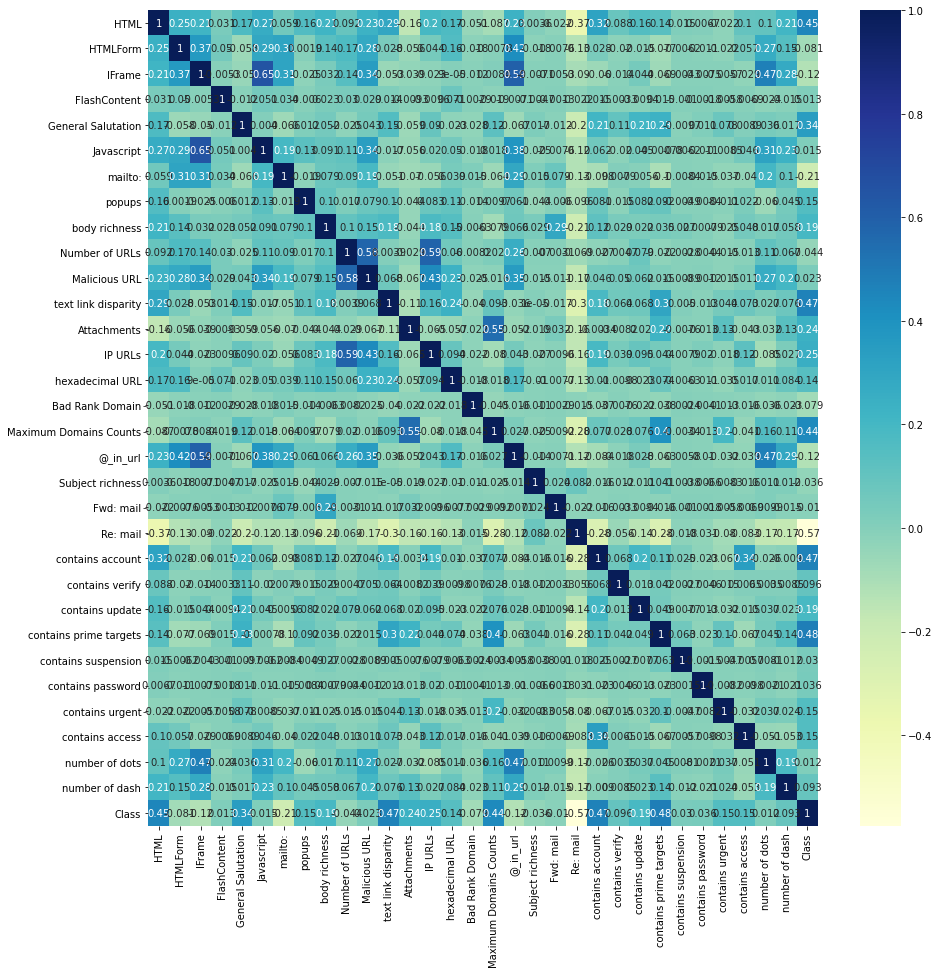

In [5]:
%matplotlib inline
plt.figure(figsize = (15,15))
sns.heatmap(mails.corr(),annot=True,cmap="YlGnBu")


### Visualization: Matplotlib

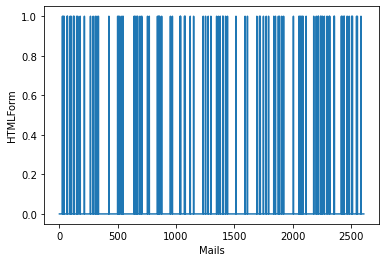

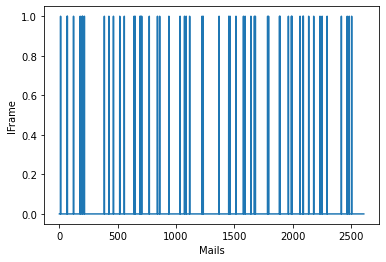

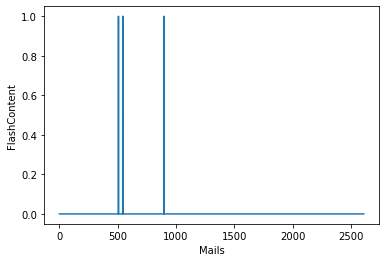

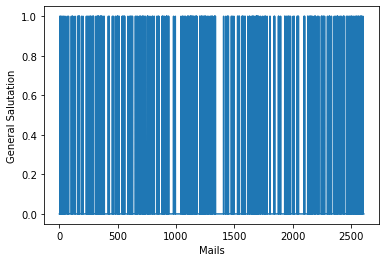

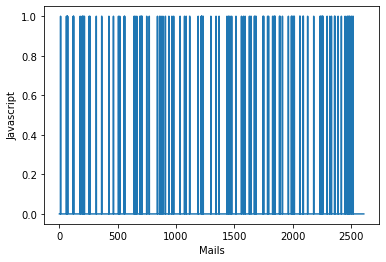

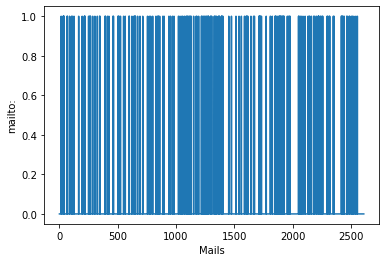

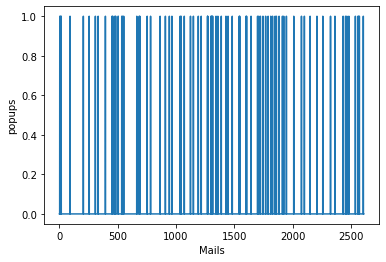

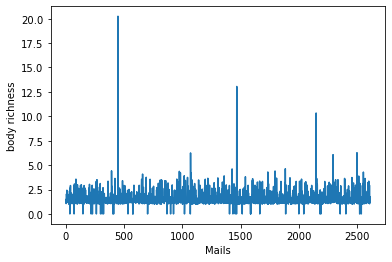

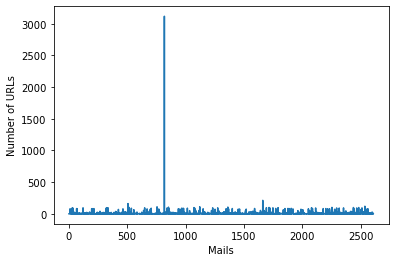

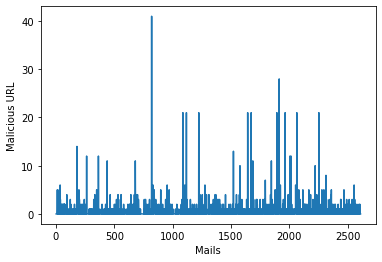

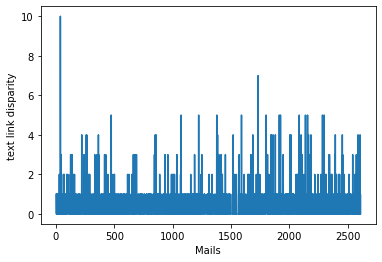

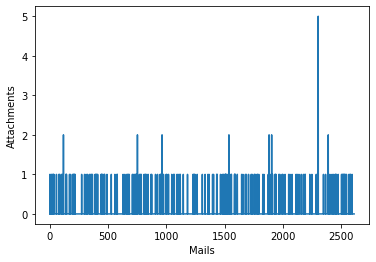

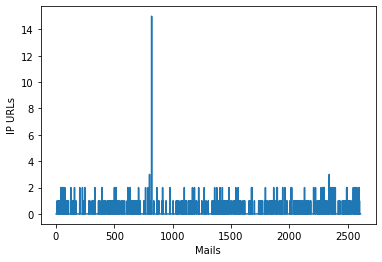

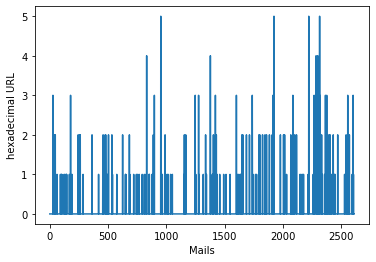

In [509]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_data():
        feature_val = np.array(mails).T
        fields = mails.columns
        xpoints = np.arange(1,len(mails)+1,1)
        for i in range(1,15,1):
            ypoints = np.array(feature_val[i])
            plt.ylabel(fields[i]) 
            
            plt.xlabel("Mails")
            plt.plot(xpoints, ypoints)
            plt.show()
        
visualize_data()
logger.debug("Matplotlib visualization done")

### Histogram, PDF and CDF

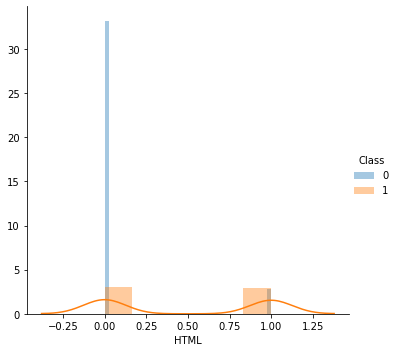

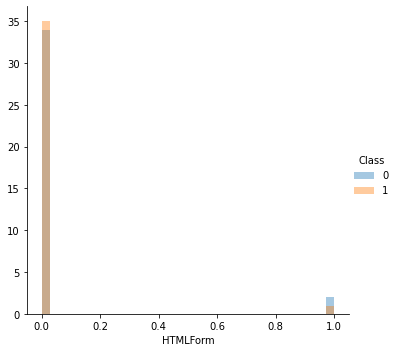

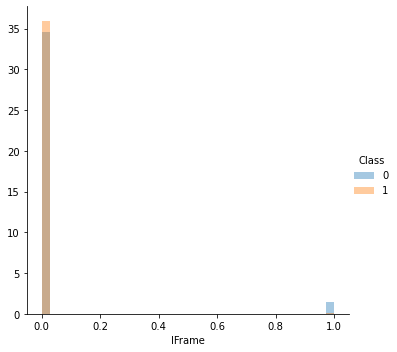

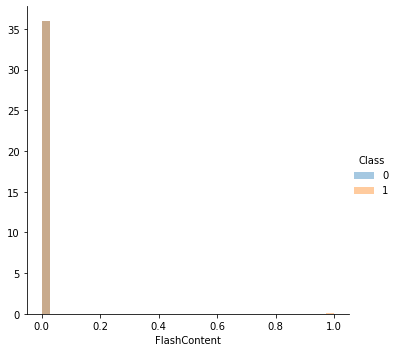

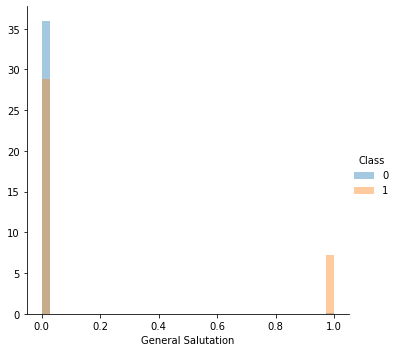

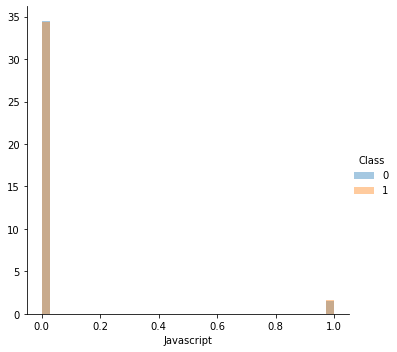

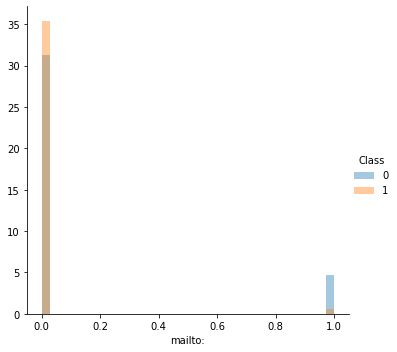

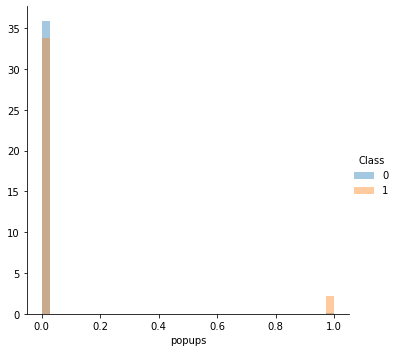

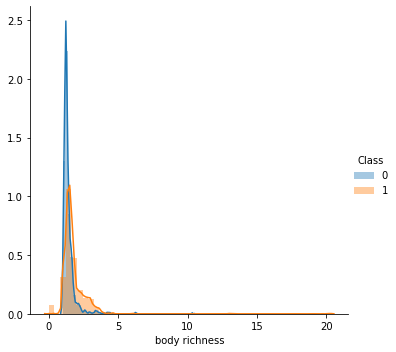

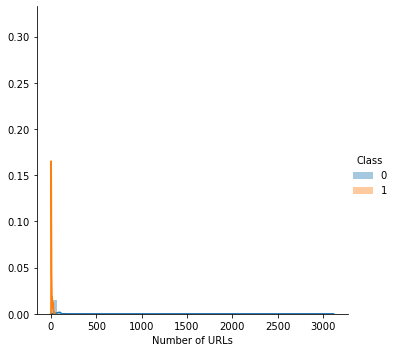

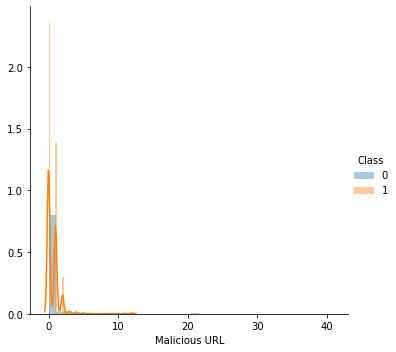

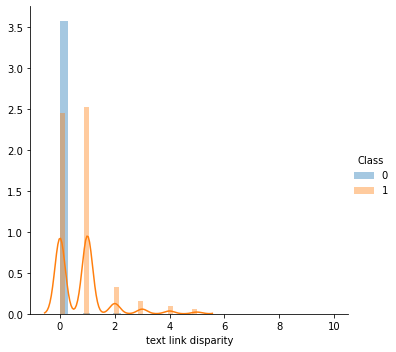

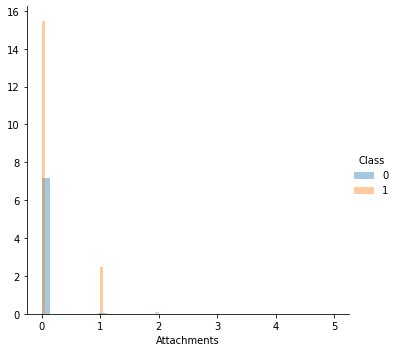

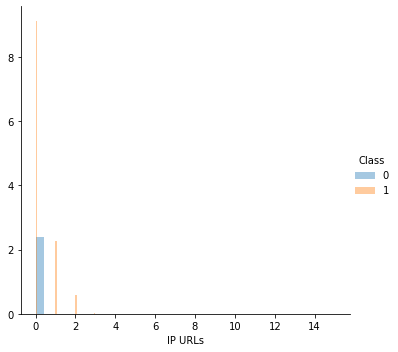

In [510]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

columns = mails.columns[:14]
for column in columns:
    sns.FacetGrid(mails, hue="Class", height=5) \
       .map(sns.distplot, column) \
       .add_legend();
    plt.show();
logger.debug("Histogram PDF CDF displayed")
#     sns.displot(penguins, x=column , hue="species", kind="kde", multiple="stack")



### Violin plots

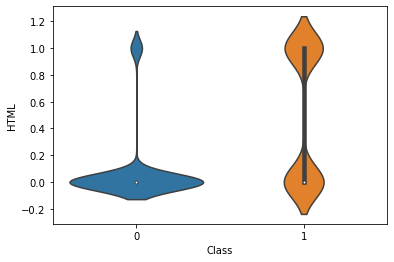

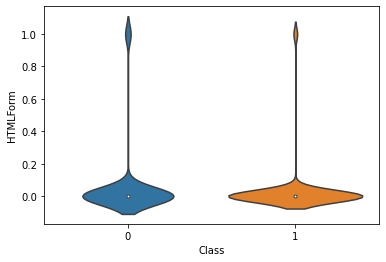

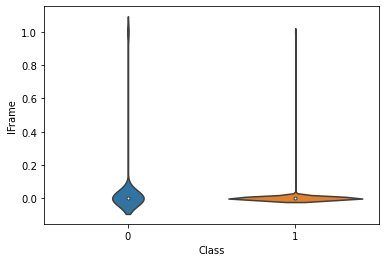

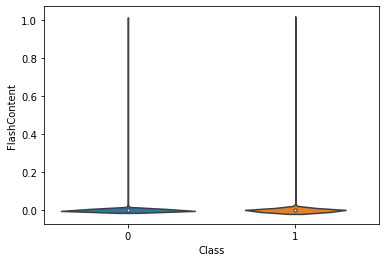

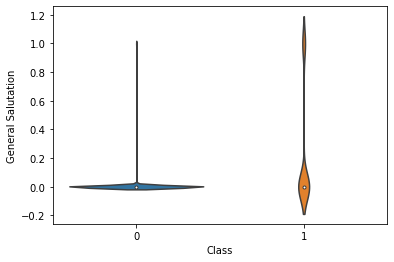

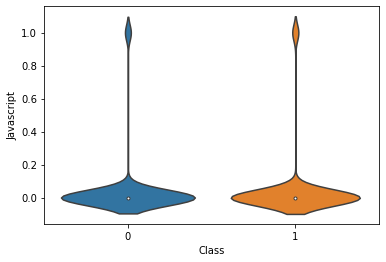

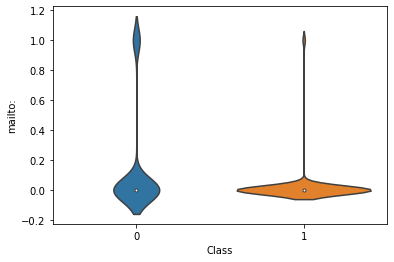

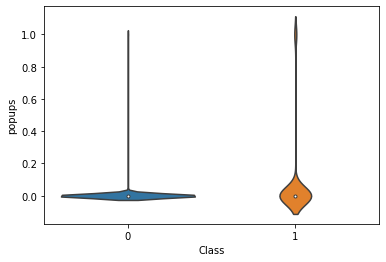

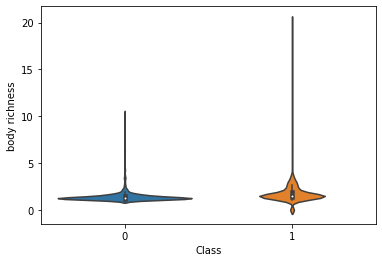

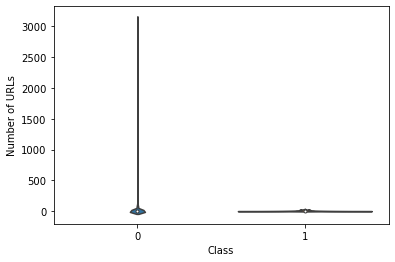

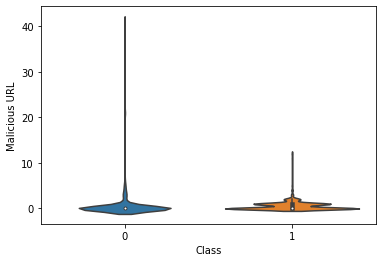

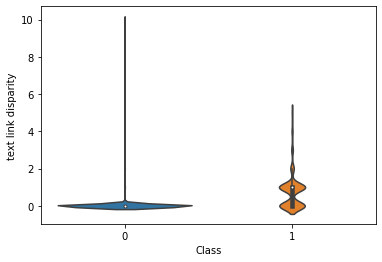

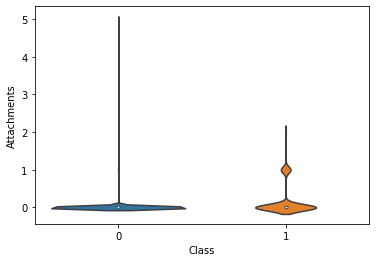

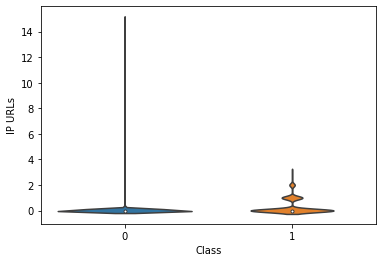

In [511]:

for column in columns:
    sns.violinplot(x="Class", y=column, data=mails, size=8)
    plt.show()
logger.debug("Violin plots shown")  


### Principal Component Analysis

#### PCA for visualization

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

d0 = mails.copy(deep=True)
dataFrame = shuffle(d0)
data = dataFrame
labels = data['Class']


# Drop the label feature and store the pixel data in d.
data = data.drop("Class",axis=1)
# logger.debug("Data shape = %d",data.shape)
# logger.debug("Label shape = %d",labels.shape)



In [524]:
# initializing the pca
from sklearn import decomposition
import seaborn as sn
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)

data  = standardized_data
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_model = pca.fit_transform(data)

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_model.T, labels)).T


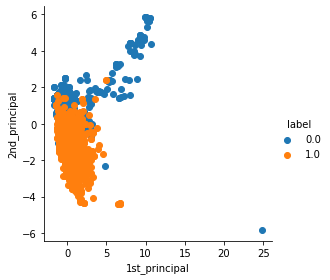

Plotted PCA with components = 2


In [525]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=4).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
print("Plotted PCA with components =",pca.n_components)

# logger.debug("Plotted PCA with components = ",pca.n_components)


(2609, 31)


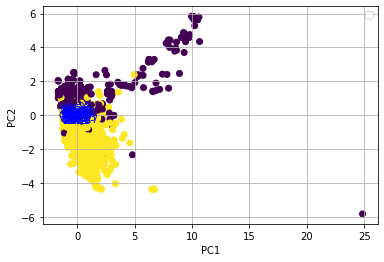

In [529]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#In general it is a good idea to scale the data
scaler = StandardScaler()
X =  X_train.copy(deep=True)
y = Y_train.copy()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)   
print(x_new.shape)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.legend()
plt.grid()

#Call the function. 
myplot(x_new[:,0:3], pca.components_) 
plt.show()

In [530]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


model = PCA(n_components=4).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_train.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,Number of URLs
1,PC1,Malicious URL
2,PC2,Maximum Domains Counts
3,PC3,number of dots


#### PCA for dimentionality reduction

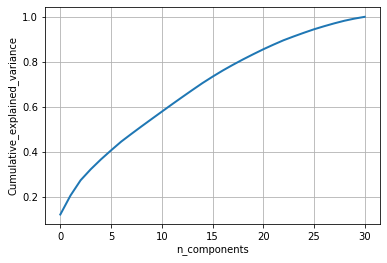

In [532]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = len(mails.columns)-1
pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
logger.debug("Cumulative explained variance graph plotted")

# If we take 21-dimensions, approx. 90% of variance is explained.

As we can see from the graph, if we take 10 features we are preserving more than 90% variance.

### t-SNE using Scikit-Learn

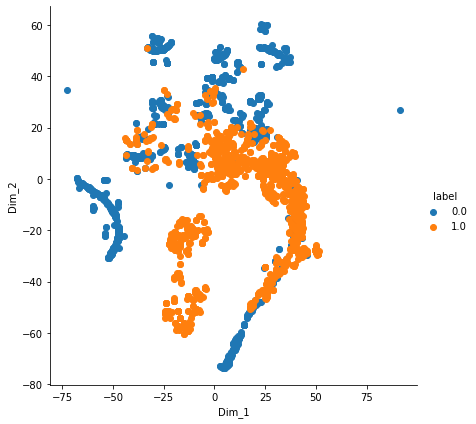

In [535]:
# TSNE

from sklearn.manifold import TSNE


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(X_train)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("t-SNE with default configurations plotted")

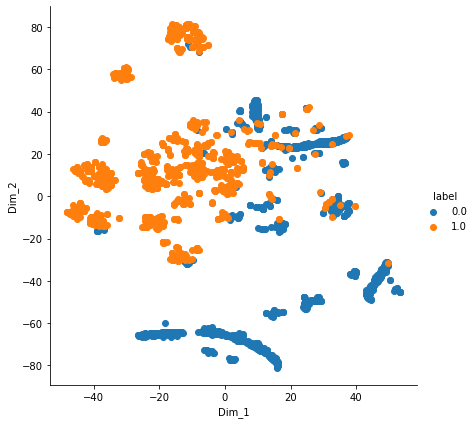

In [536]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)

tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("t-SNE with perplexity = 50 and steps = 5000")

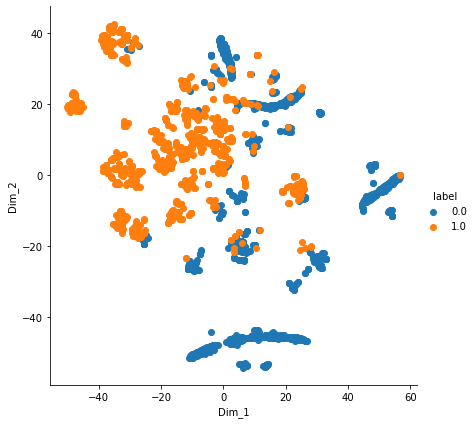

In [364]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("t-SNE with perplexity = 50 and steps = 1000")

### Single Value Decomposition

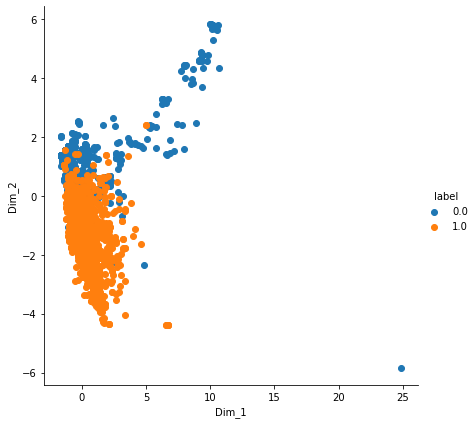

In [537]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd_data = svd.fit_transform(data)

svd_data = np.vstack((svd_data.T, labels)).T
svd_df = pd.DataFrame(data=svd_data, columns=("Dim_1", "Dim_2", "label"))
palette =(zip(svd_data, sns.color_palette()))

palette = sns.color_palette()
sn.FacetGrid(svd_df, hue="label",palette=palette, size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
logger.debug("SVD with default configurations plotted")

In [630]:
!pip install dataprep

  Using cached dataprep-0.3.0-py3-none-any.whl (1.8 MB)
Processing c:\users\vipin singh negi\appdata\local\pip\cache\wheels\ea\4e\3b\0634f08a7980461ad630fa4147cbd25913b008b4a02992ba66\metaphone-0.6-py3-none-any.whl
  Using cached usaddress-0.5.10-py2.py3-none-any.whl (63 kB)
  Using cached aiohttp-3.7.4.post0-cp38-cp38-win_amd64.whl (635 kB)
  Using cached regex-2020.11.13-cp38-cp38-win_amd64.whl (270 kB)
  Using cached dask-2.30.0-py3-none-any.whl (848 kB)
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)
  Using cached jsonpath_ng-1.5.2-py3-none-any.whl (28 kB)
  Using cached python_crfsuite-0.9.7-cp38-cp38-win_amd64.whl (156 kB)
  Using cached probableparsing-0.0.1-py2.py3-none-any.whl (3.1 kB)
  Using cached multidict-5.1.0-cp38-cp38-win_amd64.whl (48 kB)
  Using cached yarl-1.6.3-cp38-cp38-win_amd64.whl (125 kB)
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
  Running setup.py clean for python-Leven

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Vipin Singh Negi\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Vipin Singh Negi\\AppData\\Local\\Temp\\pip-install-c762epd1\\python-Levenshtein\\setup.py'"'"'; __file__='"'"'C:\\Users\\Vipin Singh Negi\\AppData\\Local\\Temp\\pip-install-c762epd1\\python-Levenshtein\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Vipin Singh Negi\AppData\Local\Temp\pip-wheel-mt_ickjh'
       cwd: C:\Users\Vipin Singh Negi\AppData\Local\Temp\pip-install-c762epd1\python-Levenshtein\
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-3.8\Levenshte

In [1]:
import dataprep
from dataprep import eda

DS = pd.read_csv("./dataset/mails_dataset.csv")
eda.create_report(DS, title="titanic report")



ModuleNotFoundError: No module named 'dataprep'

### Feature Selection

In [54]:
## Remove features with missing values
X_train.isnull().any().any()

False

#### Variance Filter

In [55]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.16))
sel.fit(X_train)
cols = sel.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
Selected_features_VarianceFilter = features_df_new.columns
Selected_features_VarianceFilter

Index(['HTML', 'body richness', 'Number of URLs', 'Malicious URL',
       'text link disparity', 'IP URLs', 'hexadecimal URL',
       'Maximum Domains Counts', 'Re: mail', 'number of dots',
       'number of dash'],
      dtype='object')

In [56]:
Filtered = X_train[Selected_features_VarianceFilter]

#### Feature Importance with Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
X_trainn = Filtered
model = RandomForestClassifier(random_state=42, max_depth=10)
model.fit(X_trainn,Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

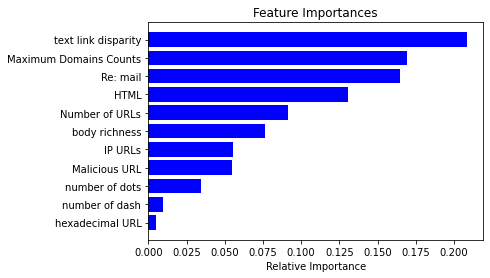

['text link disparity',
 'Maximum Domains Counts',
 'Re: mail',
 'HTML',
 'Number of URLs',
 'body richness',
 'IP URLs',
 'Malicious URL',
 'number of dots',
 'number of dash',
 'hexadecimal URL']

In [58]:
features = X_trainn.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-13:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Selected_features_RandomForestClassifier = [features[index] for index in indices]
Selected_features_RandomForestClassifier.reverse()
Selected_features_RandomForestClassifier

#### Univariate using SelectKBest

In [60]:
#UNIVARIATE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = X_train, Y_train
selector = SelectKBest(chi2, k=11)
selector.fit(X,y)
# sel.scores_
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
Selected_features_Univariate = features_df_new.columns
Selected_features_Univariate 

Index(['HTML', 'General Salutation', 'Number of URLs', 'text link disparity',
       'Attachments', 'IP URLs', 'hexadecimal URL', 'Maximum Domains Counts',
       'Re: mail', 'contains account', 'contains prime targets'],
      dtype='object')

UNION ALL SELECTED CANDIDATES

In [109]:
# Selected_features = ((Selected_features_RandomForestClassifier + Selected_features_Univariate) + Selected_features_VarianceFilter)
# # len(set(Selected_features))
Selected_features = []
Selected_features.extend(Selected_features_RandomForestClassifier) 
Selected_features.extend(Selected_features_Univariate)
Selected_features.extend(Selected_features_VarianceFilter)
Selected_features = set(Selected_features)
Selected_features

{'Attachments',
 'General Salutation',
 'HTML',
 'IP URLs',
 'Malicious URL',
 'Maximum Domains Counts',
 'Number of URLs',
 'Re: mail',
 'body richness',
 'contains account',
 'contains prime targets',
 'hexadecimal URL',
 'number of dash',
 'number of dots',
 'text link disparity'}

#### High Correlation Filter

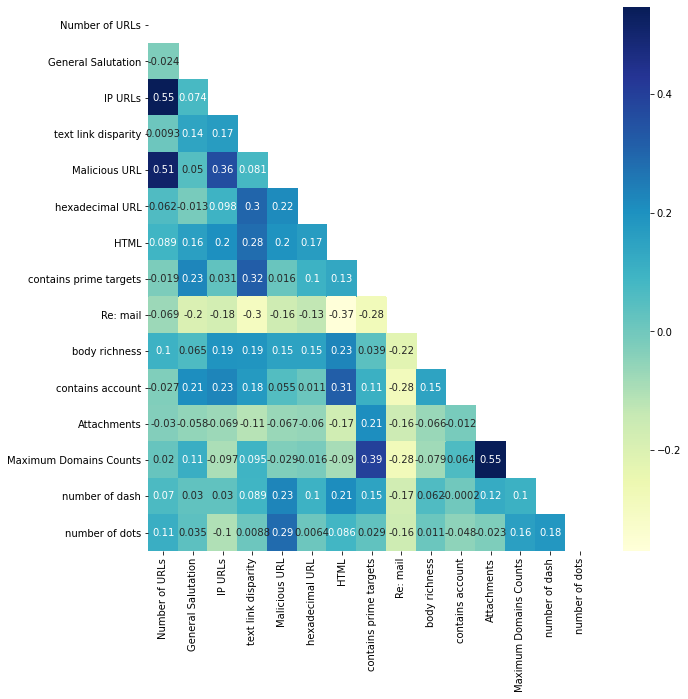

In [62]:
Filtered = X_train[Selected_features]
plt.figure(figsize = (10,10))
# creating mask
mask = np.triu(np.ones_like(Filtered.corr()))
  

sns.heatmap(Filtered.corr(),annot=True,cmap="YlGnBu", mask=mask)


In [175]:
Selected_features

{'Attachments',
 'General Salutation',
 'HTML',
 'IP URLs',
 'Malicious URL',
 'Maximum Domains Counts',
 'Number of URLs',
 'Re: mail',
 'body richness',
 'contains account',
 'contains prime targets',
 'hexadecimal URL',
 'number of dash',
 'number of dots',
 'text link disparity'}

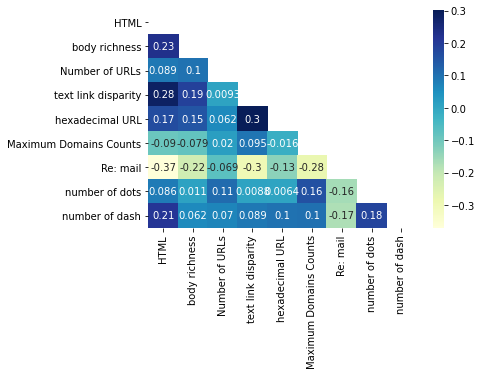

In [559]:
trainingDF = Filtered.copy(deep=True)
corrMatrix = trainingDF.corr().abs()
upperTriangle = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))
dropFeatures = [column for column in upperTriangle.columns if any(upperTriangle[column]>0.5)]
Filtered.drop(dropFeatures,axis=1,inplace=True)
# print(dropFeatures)
Filtered
mask = np.triu(np.ones_like(Filtered.corr()))
sns.heatmap(Filtered.corr(),annot=True,cmap="YlGnBu", mask=mask)


In [394]:
#FORWARD FEATURE SELECTION
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

x_train, x_cv, y_train, y_cv=train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train)

In [395]:
def evaluate_metric(model, x_cv, y_cv):
    return f1_score(y_cv, model.predict(x_cv), average='micro')

In [396]:
def forward_feature_selection(x_train, x_cv, y_train, y_cv, n):
    feature_set = []
    for num_features in range(n):
        metric_list = [] # Choose appropriate metric based on business problem
        model = SGDClassifier() # You can choose any model you like, this technique is model agnostic
        for feature in x_train.columns:
            if feature not in feature_set:
                f_set = feature_set.copy()
                f_set.append(feature)
                model.fit(x_train[f_set], y_train)
                metric_list.append((evaluate_metric(model, x_cv[f_set], y_cv), feature))

        metric_list.sort(key=lambda x : x[0], reverse = True) # In case metric follows "the more, the merrier"
        feature_set.append(metric_list[0][1])
    return feature_set

In [398]:
Forward_selected_features=forward_feature_selection(x_train, x_cv, y_train, y_cv, 11)
Forward_selected_features

['Re: mail',
 'mailto:',
 'Bad Rank Domain',
 'contains prime targets',
 'text link disparity',
 'contains account',
 'Attachments',
 'HTML',
 'Number of URLs',
 'IP URLs',
 'IFrame']

## Selecting Best Classifiers

In [76]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef,roc_auc_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


In [176]:
X_train = X_train[Selected_features]
X_test = X_test[Selected_features]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

def training_and_cross_validation(model):
    
    X = X_train
    y = Y_train

    skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

    accuracy_list = []
    conf_matrix_list = []

    for train_index, test_index in skf.split(X, y):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
    
        Xtrain = sc.fit_transform(Xtrain)
        Xtest = sc.transform(Xtest)
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        accuracy = accuracy_score(ytest, predictions)
        accuracy_list.append(accuracy)
        CM=confusion_matrix(ytest, predictions)
        conf_matrix_list.append(CM)

    avg_conf_matrix = np.array((pd.DataFrame(np.ceil(np.mean(conf_matrix_list, axis=0)))).astype(int))

    labels =['Ham','Phishing']

    fig, ax = plot_confusion_matrix(conf_mat=avg_conf_matrix,figsize=(4,4),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.title("Average Confusion Matrix after 10 fold validation ")
    plt.show()
    print('\n')
    mean_accuracy = np.mean(accuracy_list)
    print("Total Average Accuracy is ",np.round(mean_accuracy*100,4),"%")
    return model

In [ ]:
MCC = {}
LOG_LOSS = {}
BALANCED_ACCURACY = {}
ACCURACY = {}
F1 = {}
ROC_AUC = {}
REPORT = {}
MODEL = []
def show_performance_metrics(model,name,Xtest=X_test):
    predictions = model.predict(Xtest)
    
    train_predictions = model.predict_proba(Xtest)
    ll = log_loss(Y_test, train_predictions)
    
    report = classification_report(Y_test, predictions,labels=[0,1],digits=4)
    mcc = np.round(matthews_corrcoef(Y_test,predictions),3)
    ll = np.round((ll),3)
    roc_auc = np.round(roc_auc_score(Y_test, predictions)*100,3)
    accuracy = np.round(accuracy_score(Y_test, predictions)*100,3)
    balanced_accuracy = np.round(balanced_accuracy_score(Y_test, predictions)*100,3)
    f1 = np.round(f1_score(Y_test, predictions)*100,3)
    MCC[name] = mcc
    LOG_LOSS[name] = ll
    BALANCED_ACCURACY[name] = balanced_accuracy
    ACCURACY[name] = accuracy
    F1[name] = f1
    ROC_AUC[name] = roc_auc
    REPORT[name] = report
    labels = ["Ham","Phishing"]
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y_test,predictions),figsize=(4,4),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    title = "Confusion Matrix : "+name
    plt.title(title)
    plt.show()    
    print(report)
    print("MCC: ",mcc)    
    print("Log Loss: ",ll)
    print('f1: ',f1)
    print('Balanced Accuracy: ',balanced_accuracy)
    print('Accuracy: ',accuracy)
    print('ROC_AUC : ', roc_auc)

In [101]:
# Libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [102]:
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=10)

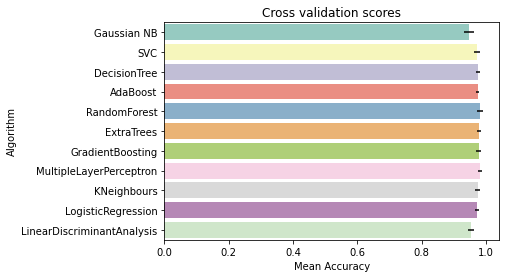

In [104]:
# Test all the above stated algorithms
random_state = 2
classifiers = []
classifiers.append(GaussianNB())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "f1", cv = kfold, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Gaussian NB","SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighbours","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## Machine Learning Models

### Naive Bayes

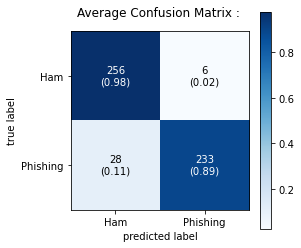



Total Average Accuracy is  93.5598 %


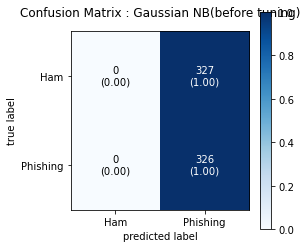

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       327
           1     0.4992    1.0000    0.6660       326

    accuracy                         0.4992       653
   macro avg     0.2496    0.5000    0.3330       653
weighted avg     0.2492    0.4992    0.3325       653

MCC:  0.0
Log Loss:  17.296
f1:  66.599
Balanced Accuracy:  50.0
Accuracy:  49.923
AUC :  50.0


In [178]:
gb = GaussianNB()
gb = training_and_cross_validation(gb)
MODEL.append("Gaussian NB(before tuning)")
show_performance_metrics(gb,MODEL[-1])

### Logistic Regression

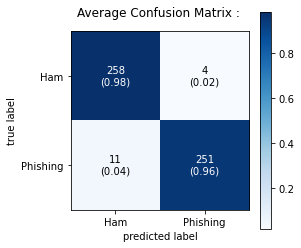



Total Average Accuracy is  97.2784 %


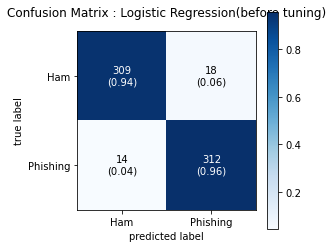

              precision    recall  f1-score   support

           0     0.9567    0.9450    0.9508       327
           1     0.9455    0.9571    0.9512       326

    accuracy                         0.9510       653
   macro avg     0.9511    0.9510    0.9510       653
weighted avg     0.9511    0.9510    0.9510       653

MCC:  0.902
Log Loss:  0.205
f1:  95.122
Balanced Accuracy:  95.1
Accuracy:  95.1
AUC :  95.1


In [179]:
lr = LogisticRegression()
lr = training_and_cross_validation(lr)
MODEL.append("Logistic Regression(before tuning)")
show_performance_metrics(lr,MODEL[-1])

### SVC

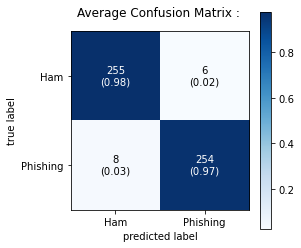



Total Average Accuracy is  97.3934 %


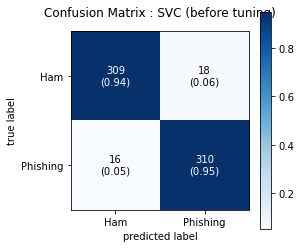

              precision    recall  f1-score   support

           0     0.9508    0.9450    0.9479       327
           1     0.9451    0.9509    0.9480       326

    accuracy                         0.9479       653
   macro avg     0.9479    0.9479    0.9479       653
weighted avg     0.9479    0.9479    0.9479       653

MCC:  0.896
Log Loss:  0.139
f1:  94.801
Balanced Accuracy:  94.794
Accuracy:  94.793
AUC :  94.794


In [180]:
svc = SVC(probability=True)
svc = training_and_cross_validation(svc)
MODEL.append('SVC (before tuning)')
show_performance_metrics(svc,MODEL[-1])

### Gradient Boosting

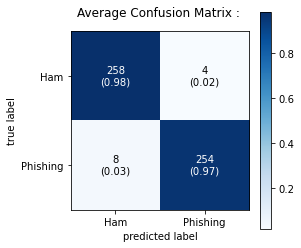



Total Average Accuracy is  97.8918 %


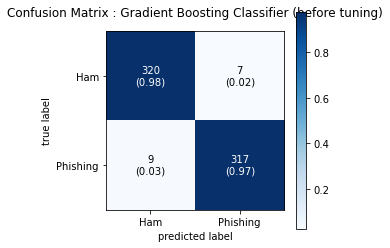

              precision    recall  f1-score   support

           0     0.9726    0.9786    0.9756       327
           1     0.9784    0.9724    0.9754       326

    accuracy                         0.9755       653
   macro avg     0.9755    0.9755    0.9755       653
weighted avg     0.9755    0.9755    0.9755       653

MCC:  0.951
Log Loss:  0.093
f1:  97.538
Balanced Accuracy:  97.549
Accuracy:  97.55
AUC :  97.549


In [181]:
gbc = GradientBoostingClassifier()
gbc = training_and_cross_validation(gbc)
MODEL.append('Gradient Boosting Classifier (before tuning)')
show_performance_metrics(gbc,MODEL[-1])

### ExtraTrees Classifier

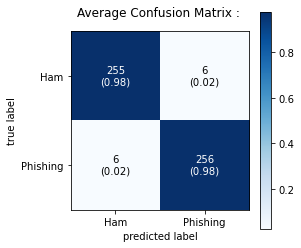



Total Average Accuracy is  97.8151 %


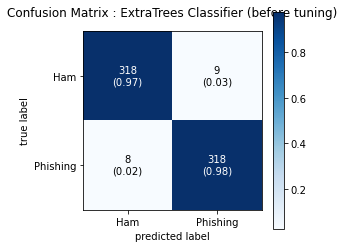

              precision    recall  f1-score   support

           0     0.9755    0.9725    0.9740       327
           1     0.9725    0.9755    0.9740       326

    accuracy                         0.9740       653
   macro avg     0.9740    0.9740    0.9740       653
weighted avg     0.9740    0.9740    0.9740       653

MCC:  0.948
Log Loss:  0.101
f1:  97.397
Balanced Accuracy:  97.397
Accuracy:  97.397
AUC :  97.397


In [182]:
extc = ExtraTreesClassifier()
extc = training_and_cross_validation(extc)
MODEL.append('ExtraTrees Classifier (before tuning)')
show_performance_metrics(extc,MODEL[-1])

### Random Forest Classifier

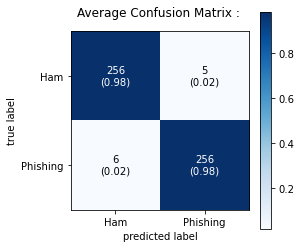



Total Average Accuracy is  98.0068 %


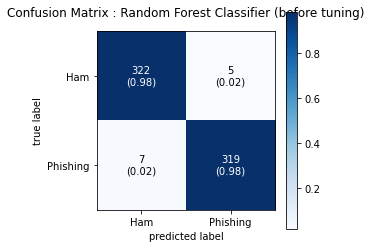

              precision    recall  f1-score   support

           0     0.9787    0.9847    0.9817       327
           1     0.9846    0.9785    0.9815       326

    accuracy                         0.9816       653
   macro avg     0.9816    0.9816    0.9816       653
weighted avg     0.9816    0.9816    0.9816       653

MCC:  0.963
Log Loss:  0.14
f1:  98.154
Balanced Accuracy:  98.162
Accuracy:  98.162
AUC :  98.162


In [183]:
rf_c = RandomForestClassifier()
rf_c  = training_and_cross_validation(rf_c )
MODEL.append('Random Forest Classifier (before tuning)')
show_performance_metrics(rf_c,MODEL[-1])

## Fine tuning selected models

### ExtraTrees Classifier

In [105]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   45.6s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   59.7s finished


0.9827556734453285

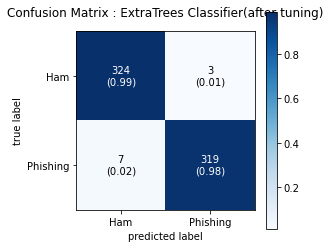

              precision    recall  f1-score   support

           0     0.9789    0.9908    0.9848       327
           1     0.9907    0.9785    0.9846       326

    accuracy                         0.9847       653
   macro avg     0.9848    0.9847    0.9847       653
weighted avg     0.9848    0.9847    0.9847       653

MCC:  0.969
Log Loss:  0.105
f1:  98.457
Balanced Accuracy:  98.468
Accuracy:  98.469
AUC :  98.468


In [184]:
MODEL.append("ExtraTrees Classifier(after tuning)")
show_performance_metrics(gsExtC,"ExtraTrees Classifier(after tuning)",X_test)

### Random Forest Classifier

In [170]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini","entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  3.0min finished


0.9835219569702328

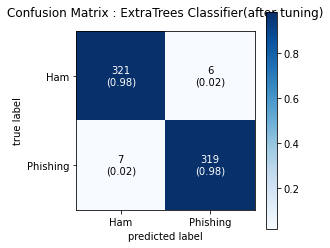

              precision    recall  f1-score   support

           0     0.9787    0.9817    0.9802       327
           1     0.9815    0.9785    0.9800       326

    accuracy                         0.9801       653
   macro avg     0.9801    0.9801    0.9801       653
weighted avg     0.9801    0.9801    0.9801       653

MCC:  0.96
Log Loss:  0.067
f1:  98.003
Balanced Accuracy:  98.009
Accuracy:  98.009
AUC :  98.009


In [185]:
# MODEL.append("Random Forest(after tuning)")
show_performance_metrics(gsRFC,MODEL[-1],X_test)

### Gradient Boosting

In [121]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   35.3s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   56.4s finished


0.9823725316828765

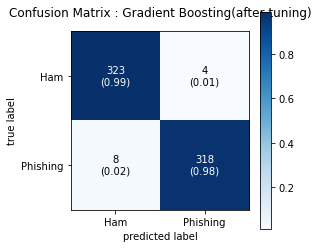

              precision    recall  f1-score   support

           0     0.9758    0.9878    0.9818       327
           1     0.9876    0.9755    0.9815       326

    accuracy                         0.9816       653
   macro avg     0.9817    0.9816    0.9816       653
weighted avg     0.9817    0.9816    0.9816       653

MCC:  0.963
Log Loss:  0.072
f1:  98.148
Balanced Accuracy:  98.161
Accuracy:  98.162
AUC :  98.161


In [186]:
MODEL.append("Gradient Boosting(after tuning)")
show_performance_metrics(gsGBC,MODEL[-1],X_test)

### SVC

In [116]:


### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 2,3,5,0.5,0.2]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_



Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   27.2s finished


0.9785396404361922

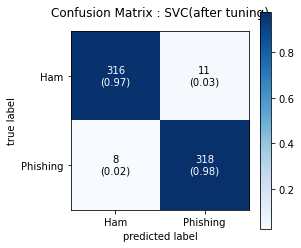

              precision    recall  f1-score   support

           0     0.9753    0.9664    0.9708       327
           1     0.9666    0.9755    0.9710       326

    accuracy                         0.9709       653
   macro avg     0.9709    0.9709    0.9709       653
weighted avg     0.9709    0.9709    0.9709       653

MCC:  0.942
Log Loss:  0.11
f1:  97.099
Balanced Accuracy:  97.091
Accuracy:  97.09
AUC :  97.091


In [187]:
MODEL.append("SVC(after tuning)")
show_performance_metrics(gsSVMC,MODEL[-1],X_test)

### Logistic Regression

In [113]:
LR = LogisticRegression()

lr_param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty' : ['l2'],
                 'C' : [1.0, 0.1, 1.5,2.5,5,5.5,0.01]}

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsLR.fit(X_train,Y_train)

LR_best = gsLR.best_estimator_

# Best score
gsLR.best_score_



Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    2.0s finished


0.9727907444528725

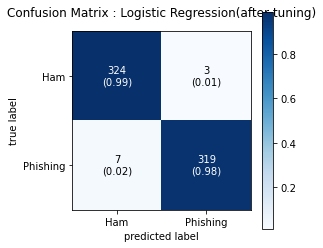

              precision    recall  f1-score   support

           0     0.9789    0.9908    0.9848       327
           1     0.9907    0.9785    0.9846       326

    accuracy                         0.9847       653
   macro avg     0.9848    0.9847    0.9847       653
weighted avg     0.9848    0.9847    0.9847       653

MCC:  0.969
Log Loss:  0.105
f1:  98.457
Balanced Accuracy:  98.468
Accuracy:  98.469
AUC :  98.468


In [188]:
MODEL.append("Logistic Regression(after tuning)")
show_performance_metrics(gsExtC,MODEL[-1],X_test)

##  Ensemble Model

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   56.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   16.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   31.7s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   50.2s finished


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   22.4s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   43.6s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:   32.1s
[Parallel(n_jobs=4)]: Done 562 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 912 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.6min finished


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   16.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   51.6s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   26.6s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   52.2s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   59.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.7min finished


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   16.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   47.3s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   47.8s finished


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   23.6s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   44.8s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   54.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.6min finished


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   17.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   41.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   52.4s finished


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   24.9s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   48.1s finished


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done 304 tasks      | elapsed:   33.6s
[Parallel(n_jobs=4)]: Done 554 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 904 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   17.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   31.8s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   50.9s finished


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   24.1s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   47.0s finished


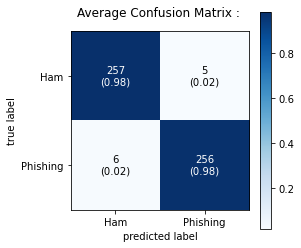



Total Average Accuracy is  98.0834 %


VotingClassifier(estimators=[('Random Forest Model',
                              GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                                           estimator=RandomForestClassifier(),
                                           n_jobs=4,
                                           param_grid={'bootstrap': [False],
                                                       'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [None],
                                                       'max_features': [1, 3,
                                                                        10],
                                                       'min_samples_leaf': [1,
                                                                            3,
                                                                            10],


In [194]:
voting_model = VotingClassifier(
    [
        ("Random Forest Model", gsRFC),
        ("Logistic Regression", gsLR),
        ("SVC",gsSVMC),
        ("ExtraTrees Classifier",gsExtC),
        ("Gradient Boosting",gsGBC)
    ],voting="soft",flatten_transform=True
)

training_and_cross_validation(voting_model)



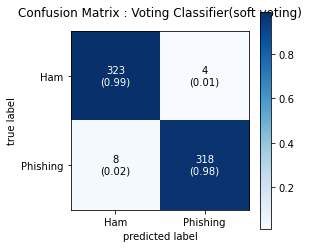

              precision    recall  f1-score   support

           0     0.9758    0.9878    0.9818       327
           1     0.9876    0.9755    0.9815       326

    accuracy                         0.9816       653
   macro avg     0.9817    0.9816    0.9816       653
weighted avg     0.9817    0.9816    0.9816       653

MCC:  0.963
Log Loss:  0.099
f1:  98.148
Balanced Accuracy:  98.161
Accuracy:  98.162
AUC :  98.161


In [195]:
MODEL.append("Voting Classifier(soft voting)")
show_performance_metrics(voting_model,MODEL[-1])


## Performance Comparisons

In [200]:
performance_comp = []
performance_comp.append(["Model","Accuracy","Balanced Accuracy","Log loss","F1 Score","MCC","ROC_AUC","Report"])
for model in MODEL:
    row = []
    row.append(model)
    row.append(ACCURACY[model])
    row.append(BALANCED_ACCURACY[model])
    row.append(LOG_LOSS[model])
    row.append(F1[model])
    row.append(MCC[model])
    row.append(ROC_AUC[model])
    row.append(REPORT[model])
    performance_comp.append(row)
performance_comp = pd.DataFrame(performance_comp[1:],columns=performance_comp[0])
performance_comp
performance_comp.to_csv('performance comparision.csv')

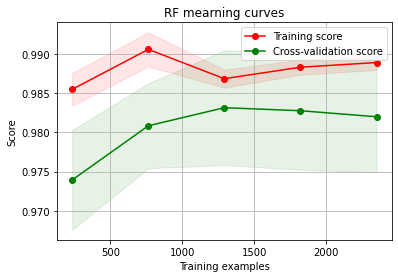

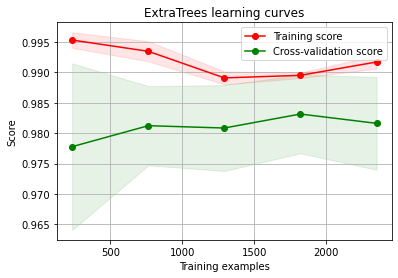

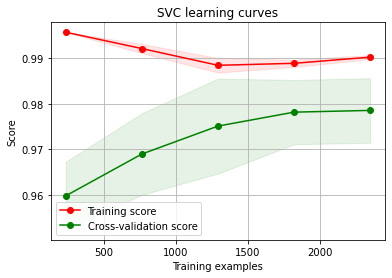

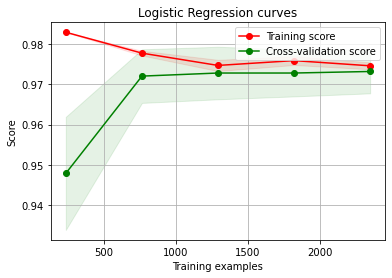

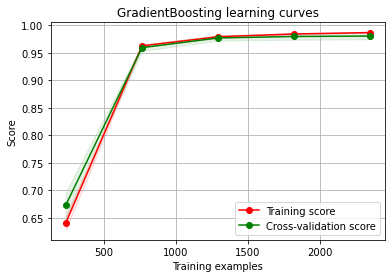

In [126]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLR.best_estimator_,"Logistic Regression curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

## Conclusions